In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

# Load .env for DB credentials
load_dotenv()

POSTGRES_URI = os.getenv('POSTGRES_URI')
engine = create_engine(POSTGRES_URI)

# Set plot style
sns.set(style="whitegrid")

Load YOLO + Message Data

In [3]:
query = """
SELECT
    d.image_category,
    COUNT(*) AS num_posts,
    AVG(m.view_count) AS avg_views
FROM medical_warehouse_marts.fct_image_detections d
JOIN medical_warehouse_marts.fct_messages m
    ON d.message_id = m.message_id
GROUP BY d.image_category
ORDER BY avg_views DESC;
"""

df_category_views = pd.read_sql(query, engine)
df_category_views


,image_category,num_posts,avg_views
0,lifestyle,90,6401.344828
1,promotional,24,5105.739130
2,None,115,2228.567164
3,other,395,1622.230563
4,product_display,282,943.099631


Plot Average Views by Image Category

/var/folders/cm/vngd5r7d2x16wjb2nxg9h5mc0000gn/T/ipykernel_55835/423356542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='image_category', y='avg_views', data=df_category_views, palette='muted')


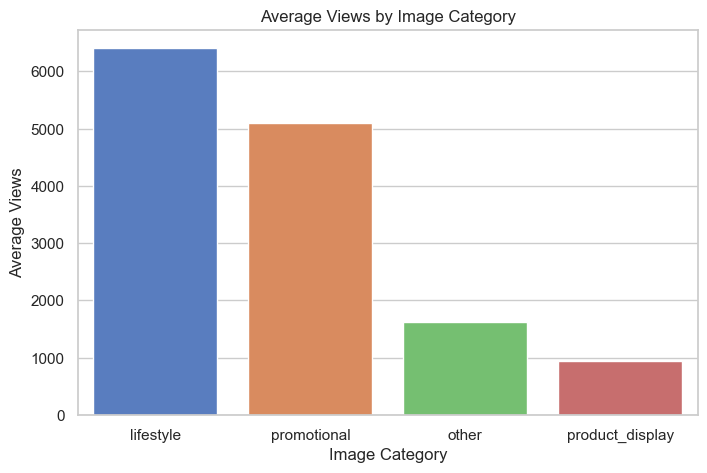

In [4]:
plt.figure(figsize=(8,5))
sns.barplot(x='image_category', y='avg_views', data=df_category_views, palette='muted')
plt.title("Average Views by Image Category")
plt.ylabel("Average Views")
plt.xlabel("Image Category")
plt.show()

Channel Visual Content Analysis

In [9]:
query_channels = """
SELECT
    c.channel_name,
    COUNT(*) AS image_posts
FROM medical_warehouse_marts.fct_image_detections d
JOIN medical_warehouse_marts.dim_channels c
    ON d.channel_key = c.channel_key
GROUP BY c.channel_name
ORDER BY image_posts DESC;
"""

df_channels = pd.read_sql(query_channels, engine)
# Define a minimum threshold of posts to keep a channel
min_posts = 45

# Filter dataframe
df_channels_filtered = df_channels[df_channels['image_posts'] >= min_posts]

df_channels_filtered

df_channels.head(5)

,channel_name,image_posts
0,lobelia4cosmetics,484
1,tikvahpharma,164
2,PharmaceuticalandMedicalgroup,82
3,CheMed123,63
4,pharmaceuticals_sales,55


Plot Top Channels by Visual Posts

/var/folders/cm/vngd5r7d2x16wjb2nxg9h5mc0000gn/T/ipykernel_55835/1673484268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='image_posts', y='channel_name', data=df_channels.head(6), palette='deep')


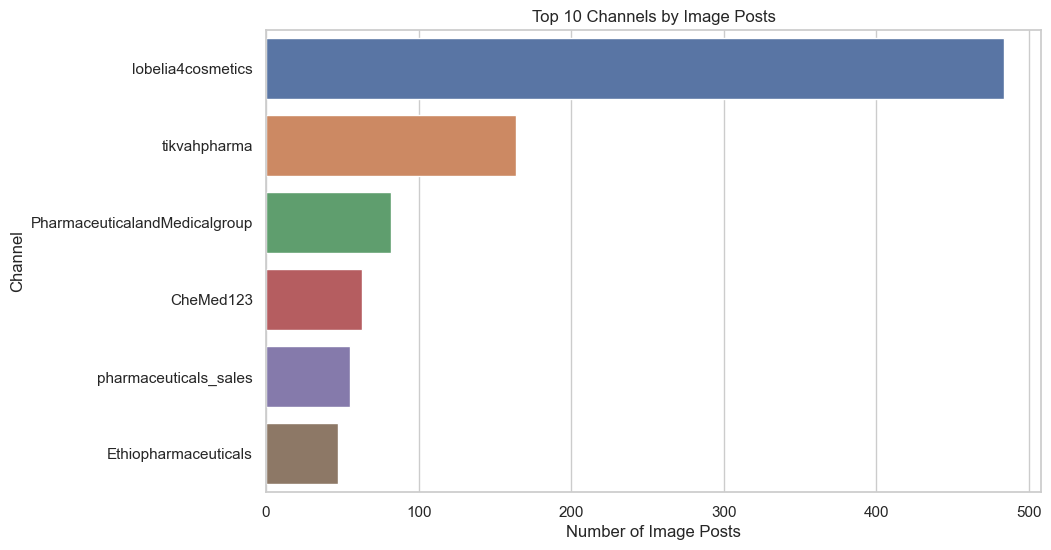

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x='image_posts', y='channel_name', data=df_channels.head(6), palette='deep')
plt.title("Top 10 Channels by Image Posts")
plt.xlabel("Number of Image Posts")
plt.ylabel("Channel")
plt.show()